参考文献：[ http://kfumix.hatenablog.com/entry/2017/06/17/145533 ]

In [1]:
# Data
rm( list = ls( envir = globalenv() ), envir = globalenv() )
library(ISLR)
attach(Wage)

## 1. Polynomial regression （多項式回帰）

- 通常の線形回帰
$$
y_i = \beta_0 + \beta_1 x_i + \epsilon_i
$$

- 多項式回帰
$$
y_i = \beta_0 + \beta_1 x_i + \beta_2 x_i^2 + \beta_3 x_i^3 + ... + \beta_d x_i^d + \epsilon_i, \tag{7.1} \\
$$

7.1式の係数は線形回帰の最小二乗法を用いて容易に算出することができる。  
一般的には，$d \geqq 5$となるd（degree:次数）は，多項式曲線が柔軟になりすぎて非常に奇妙な形になるので使用されない。

推定値$\hat{f}(x_0)$の分散$Var[\hat{f}(x_0)$]は，例えば$\hat{C}$を5×5の共分散行列とし，$l_0^T = (1, x_0, x_0^2, x_0^3, x_0^4)$とすると，
$$
Var[\hat{f}(x_0)] = l_0^T \hat{C} l_0
$$
で与えられる。

In [2]:
fit = lm(wage~poly(age, 4), data=Wage)
coef(summary(fit))

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),111.70361,0.7287409,153.283015,0.000000e+00
"poly(age, 4)1",447.06785,39.9147851,11.200558,1.484604e-28
"poly(age, 4)2",-478.31581,39.9147851,-11.983424,2.355831e-32
"poly(age, 4)3",125.52169,39.9147851,3.144742,1.678622e-03
"poly(age, 4)4",-77.91118,39.9147851,-1.951938,5.103865e-02


線形回帰の関数を使うためにlm()を使用し，4次までの多項式を作成するためにpoly(age, 4)としている。  
しかし，poly()関数は，raw=Tを加えれば，age, age^2, age^3, age^4を直接的に求めることができる。

In [3]:
fit2 = lm(wage~poly(age, 4, raw=T), data=Wage)
coef(summary(fit2))

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),-1.841542e+02,6.004038e+01,-3.067172,0.0021802539
"poly(age, 4, raw = T)1",2.124552e+01,5.886748e+00,3.609042,0.0003123618
"poly(age, 4, raw = T)2",-5.638593e-01,2.061083e-01,-2.735743,0.0062606446
"poly(age, 4, raw = T)3",6.810688e-03,3.065931e-03,2.221409,0.0263977518
"poly(age, 4, raw = T)4",-3.203830e-05,1.641359e-05,-1.951938,0.0510386498


In [4]:
# 先程と同じ多項式の係数が出てくる
fit2a = lm(wage~age+I(age^2)+I(age^3)+I(age^4), data=Wage)
coef(fit2a)

(Intercept)           age      I(age^2)      I(age^3)      I(age^4) 
-1.841542e+02  2.124552e+01 -5.638593e-01  6.810688e-03 -3.203830e-05

In [5]:
# wrapper function I()を使わない方法
fit2b = lm(wage~cbind(age, age^2, age^3, age^4), data=Wage)
coef(fit2b)

(Intercept) cbind(age, age^2, age^3, age^4)age 
                     -1.841542e+02                       2.124552e+01 
   cbind(age, age^2, age^3, age^4)    cbind(age, age^2, age^3, age^4) 
                     -5.638593e-01                       6.810688e-03 
   cbind(age, age^2, age^3, age^4) 
                     -3.203830e-05

In [6]:
# 5つの異なるモデルと連続するモデルの比較
agelims = range(age)
age.grid = seq(from=agelims[1], to=agelims[2])
preds = predict(fit, newdata=list(age=age.grid), se=TRUE)
se.bands = cbind(preds$fit + 2*preds$se.fit, preds$fit - 2*preds$se.fit)

preds2 = predict(fit2, newdata=list(age=age.grid), se=TRUE)

fit.1 = lm(wage~age, data=Wage)
fit.2 = lm(wage~poly(age, 2), data=Wage)
fit.3 = lm(wage~poly(age, 3), data=Wage)
fit.4 = lm(wage~poly(age, 4), data=Wage)
fit.5 = lm(wage~poly(age, 5), data=Wage)
anova(fit.1, fit.2, fit.3, fit.4, fit.5)
coef(summary(fit.5))

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2998,5022216,NA,NA,NA,NA
2997,4793430,1,228786.010,143.5931074,2.367734e-32
2996,4777674,1,15755.694,9.8887559,1.679213e-03
2995,4771604,1,6070.152,3.8098134,5.104623e-02
2994,4770322,1,1282.563,0.8049758,3.696820e-01


,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),111.70361,0.7287647,153.2780243,0.000000e+00
"poly(age, 5)1",447.06785,39.9160847,11.2001930,1.491111e-28
"poly(age, 5)2",-478.31581,39.9160847,-11.9830341,2.367734e-32
"poly(age, 5)3",125.52169,39.9160847,3.1446392,1.679213e-03
"poly(age, 5)4",-77.91118,39.9160847,-1.9518743,5.104623e-02
"poly(age, 5)5",-35.81289,39.9160847,-0.8972045,3.696820e-01


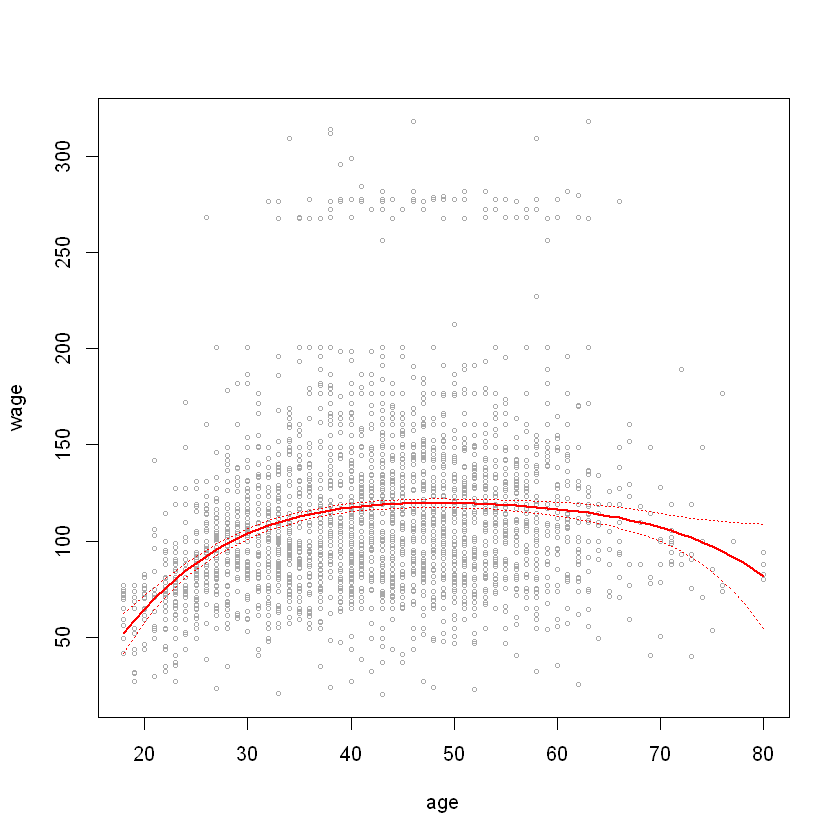

In [7]:
# Fig 7.1 Left
plot(age, wage, xlim=agelims, cex=0.5, col="darkgrey")
lines(age.grid, preds$fit, lwd=2, col="red")
matlines(age.grid, se.bands, lwd=1, col="red", lty=3)

In [8]:
# anova compare
fit.1 = lm(wage~education+age, data=Wage)
fit.2 = lm(wage~education+poly(age, 2), data=Wage)
fit.3 = lm(wage~education+poly(age, 3), data=Wage)
anova(fit.1, fit.2, fit.3)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2994,3867992,NA,NA,NA,NA
2993,3725395,1,142597.10,114.696898,2.728971e-26
2992,3719809,1,5586.66,4.493588,3.410431e-02


In [9]:
# Logistic regression
fit = glm(I(wage>250)~poly(age, 4), data=Wage, family=binomial)
preds = predict(fit, newdata=list(age=age.grid), se=T)
pfit = exp(preds$fit) / (1 + exp(preds$fit))
se.bands.logit = cbind(preds$fit + 2*preds$se.fit, preds$fit - 2 * preds$se.fit)

In [10]:
# type="response" ← 確率を求めることができる
preds = predict(fit, newdata=list(age=age.grid), type="response", se=T)

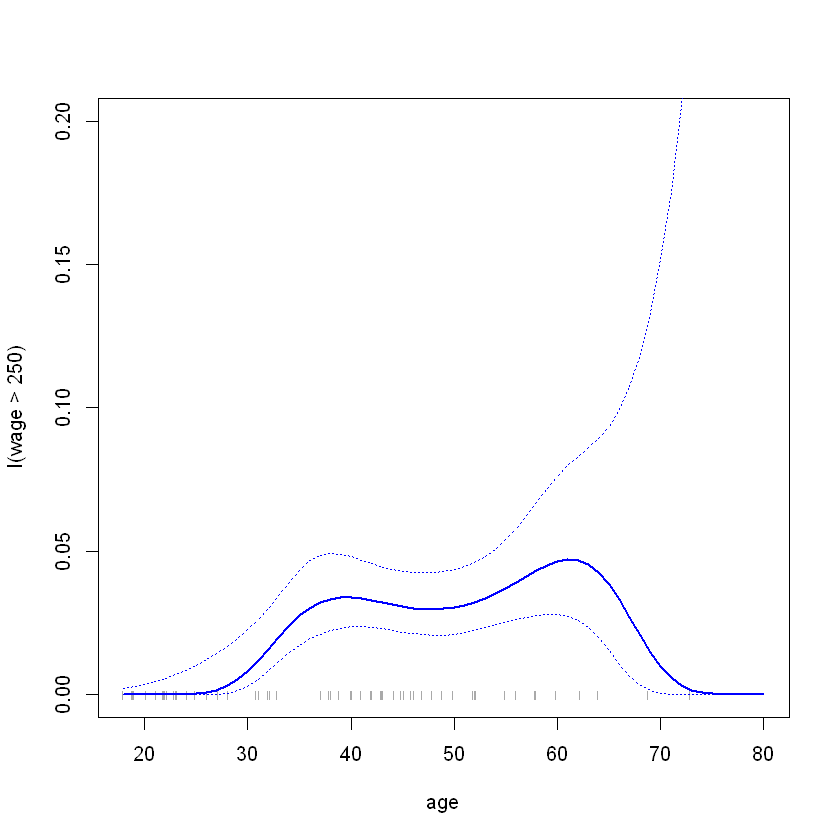

In [11]:
# Fig 7.1 right
se.bands = exp(se.bands.logit) / (1 + exp(se.bands.logit))
plot(age, I(wage > 250), xlim=agelims, type="n", ylim=c(0, 0.2))
points(jitter(age), I((wage > 250 / 5)), cex=0.5, pch="|", col="darkgrey")
lines(age.grid, pfit, lwd=2, col="blue")
matlines(age.grid, se.bands, lwd=1, col="blue", lty=3)

## 2. Step Functions（階段関数）

Xをbinsに分割する。
$$
C_0(X) = I(X < c_1) \\
C_1(X) = I(c_1 \leq	X < c_2) \\
C_2(X) = I(c_2 \leq	X < c_3) \\
\vdots \\
C_{K_1}(X) = I(c_{K_1} \leq	X < c_K) \\
C_K(X) = I(c_K \leq	X) \\
$$
ここで，$I(\cdot)$は正なら1，誤なら0を返す関数で，時々ダミー関数と呼ばれる。  
また，K+1個の間隔の中にXが存在するとき，
$$
\sum_{l=0}^K C_l(X) = 1
$$
が成り立つ。

この階段関数を用いて，  
$$
y_i = \beta_0 + \beta_1 C_1 (x_i) + \beta_2 C_2 (x_i) + \cdots + \beta_K C_K (x_i) + \epsilon_i　\tag{7.5}
$$
という形式で多項式回帰が完成する。

$X < c_1$の場合，式（7.5）の係数はすべて0になり，$\beta_0$は$X < c_1$の時のYの平均値と解釈できる。  
一方，$c_j \leq X < c_{j+1}$の場合，式（7.5）は$\beta_0 + \beta_j$となるため，$\beta_j$は$X < c_1$と比較したときの$c_j \leq X < c_{j+1}$の区間における平均の増分を示す。

In [12]:
# step function
table(cut(age, 4))
fit = lm(wage~cut(age, 4), data=Wage)
coef(summary(fit))


(17.9,33.5]   (33.5,49]   (49,64.5] (64.5,80.1] 
        750        1399         779          72 

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),94.158392,1.476069,63.789970,0.000000e+00
"cut(age, 4)(33.5,49]",24.053491,1.829431,13.148074,1.982315e-38
"cut(age, 4)(49,64.5]",23.664559,2.067958,11.443444,1.040750e-29
"cut(age, 4)(64.5,80.1]",7.640592,4.987424,1.531972,1.256350e-01


## 3. Basis Functions（基底関数）

多項式回帰やpiecewise-constant regression（階段関数を用いた，区分的に定値の回帰）は基底関数の特殊なケースである。

$$
y_i = \beta_0 + \beta_1 b_1 (x_i) + \beta_2 b_2 (x_i) + \beta_3 b_3 (x_i) + ... + \beta_K b_K (x_i) + \epsilon_i, \tag{7.7} \\
$$
ここで，$b_1(\cdot)$などは関数である。例えば，多項式回帰の場合，$b_j (x_i) = x_i^j$となる。  
基底関数にウェーブレット変換やフーリエ級数を使うこともできる。

## 4. Regression Splines

### 1. Piecewise Polynomials

区間ごとに異なる多項式回帰を利用する。
$$
y_i = 
    \begin{cases}
        \beta_{01} + \beta_{11} x_i + \beta_{21} x_i^2 + \beta_{31} x_i^3 + \epsilon_i \quad if \ x_i < c; \\
        \beta_{02} + \beta_{12} x_i + \beta_{22} x_i^2 + \beta_{32} x_i^3 + \epsilon_i \quad if \ x_i \geq c;
    \end{cases}
$$

### 2. Constraints and Splines

Piecewise Cubicが柔軟すぎてよくない例，区間の分かれ目で連続にしたPiecewise Cubicの例，cubic splineとlinear splineの例が示されている。

### 3. The Spline Basis Regression

連続した関数（1次導関数も連続）
$$
y_i = \beta_0 + \beta_1 b_1 (x_i) + \beta_2 b_2 (x_i) + \cdots + \beta_{K+3} b_{K+3} (x_i) + \epsilon_i \tag{7.9}
$$
式（7.9）は最小二乗法にも使用できる。  

切断べき基底関数は次のように定義される。

$$
h(x, \xi) = (x - \xi)_+^3 = 
    \begin{cases}
        (x - \xi)^3 \quad if \ x > \xi \\
        0 \quad otherwize,
    \end{cases} \tag{7.10}
$$
ここで，$\xi$はknot（ノット）と呼ばれる実数（ベクトル）である。

3次の（B-）スプラインは，切片と，Xの1次，2次，3次の係数と，ノットの数Kと同じ数の係数が必要となるので，自由度はK+4である。

### 4. Choosing the Number and Locations of the Knots（ノットの数と位置の選択）

### 5. Comparison to Polynomial Regression

この2つは図や例がないと説明しづらいのでスルー

## 5. Smoothing Splines

### 1. An Overview of Smoothing Splines

スムースにするために，次の式を用いるのが自然である（らしい）
$$
\sum_{i=1}^n (y_i - g(x_i))^2 + \lambda \int g^{''} (t)^2 dt \tag{7.11}
$$
ここで，$\lambda$は負ではない調整パラメータである。1項目は残差平方和（Residual sum of squares, RSS），2項目はgをスムースにする項である。

### 2. Choosing the Smoothing Parameter $\lambda$

スムースしているスプライン関数では，ノットの数や位置を決める必要はないが，$\lambda$を決定する必要がある。
$$
\hat{\bf{g}}_\lambda = \bf{S}_\lambda \bf{y} \tag{7.12} \\
$$
$$
df_\lambda = \sum_{i=1}^n \{\bf{S}_\lambda\}_{ii} \tag{7.13}
$$
自由度は（7.13）式から導出する。

In [13]:
# library
library(splines)

25%   50%   75% 
33.75 42.00 51.00

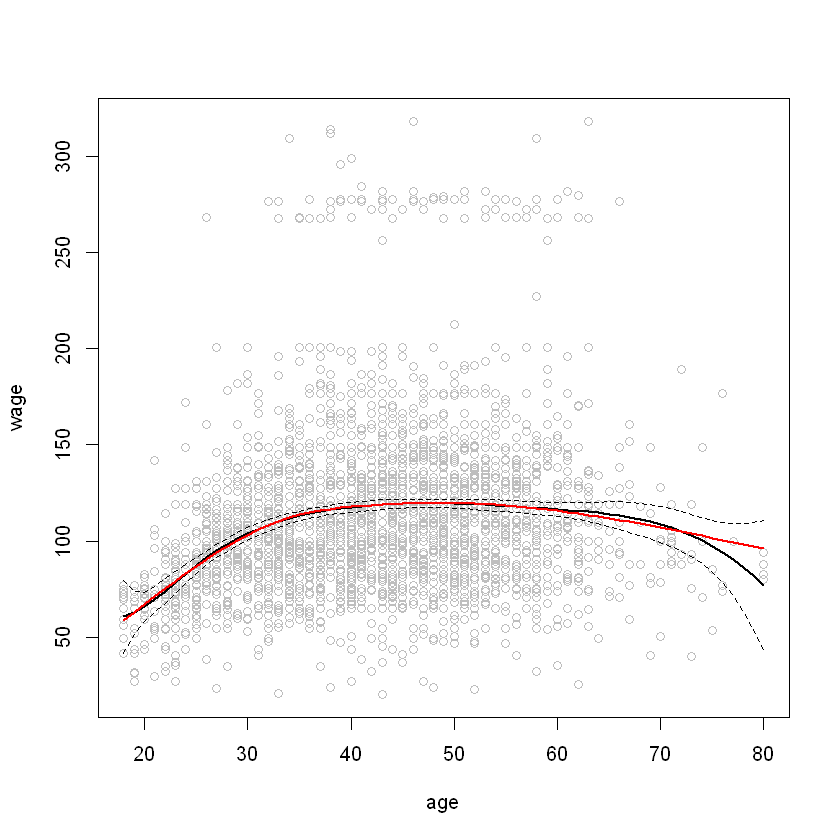

In [14]:
fit = lm(wage~bs(age, knots=c(25, 40, 60)), data=Wage)
age.grid = seq(from=agelims[1], to=agelims[2])
pred = predict(fit, newdata=list(age=age.grid), se=T)
plot(age, wage, col="gray")
lines(age.grid, pred$fit, lwd=2)
lines(age.grid, pred$fit + 2 * pred$se, lty="dashed")
lines(age.grid, pred$fit - 2 * pred$se, lty="dashed")

fit2 = lm(wage~ns(age, df=4), data=Wage)
pred2 = predict(fit2, newdata=list(age=age.grid), se=T)
lines(age.grid, pred2$fit, col="red", lwd=2)

attr(bs(age, df=6), "knots")

Warning message in smooth.spline(age, wage, cv = TRUE):
"cross-validation with non-unique 'x' values seems doubtful"

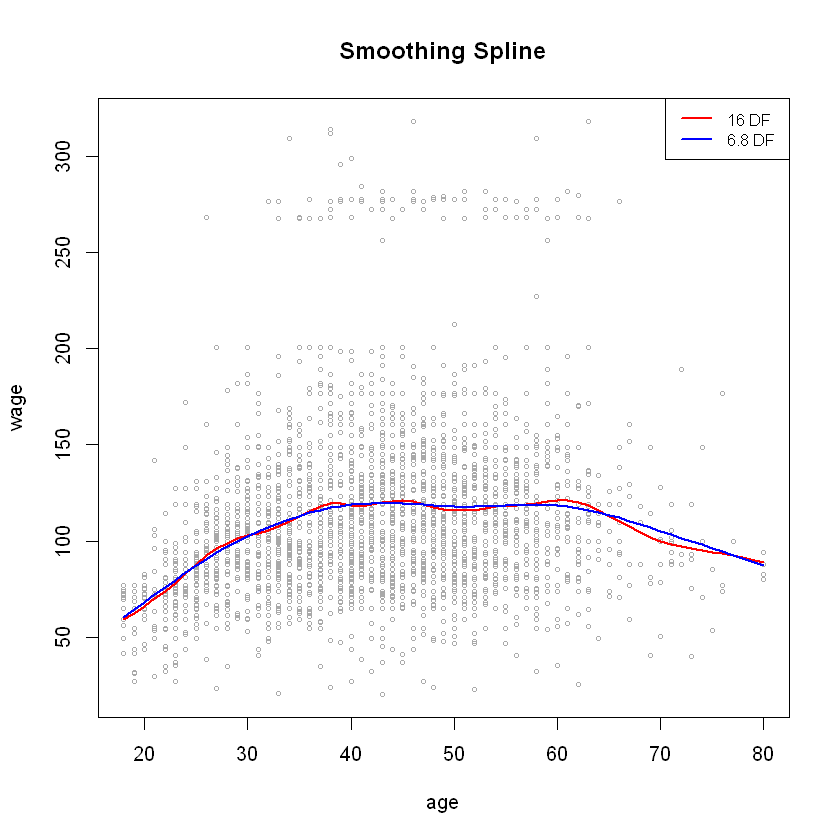

In [15]:
# Smooth spline, Fig 7.8.
plot(age, wage, xlim=agelims, cex=0.5, col="darkgrey")
title("Smoothing Spline")
fit = smooth.spline(age, wage, df=16)
fit2 = smooth.spline(age, wage, cv=TRUE)
lines(fit, col="red", lwd=2)
lines(fit2, col="blue", lwd=2)
legend("topright", legend=c("16 DF", "6.8 DF"), col=c("red", "blue"), lty=1, lwd=2, cex=0.8)

## 6. Local Regression（局所回帰）

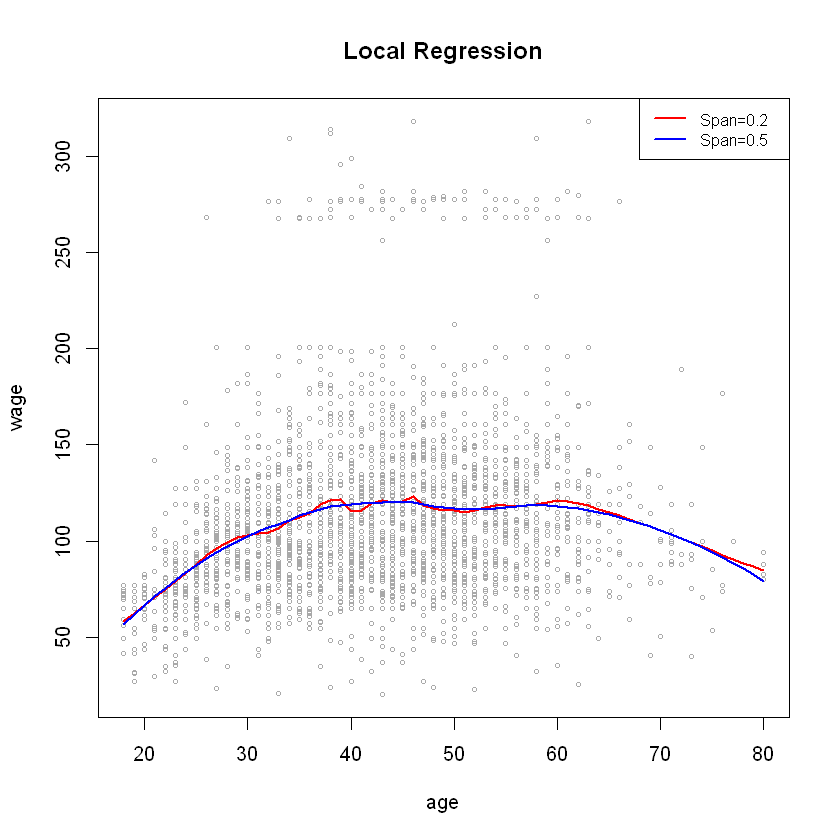

In [16]:
# Local Regression
plot(age, wage, xlim=agelims, cex=0.5, col="darkgrey")
title("Local Regression")
fit = loess(wage~age, span=0.2, data=Wage)
fit2 = loess(wage~age, span=0.5, data=Wage)
lines(age.grid, predict(fit, data.frame(age=age.grid)), col="red", lwd=2)
lines(age.grid, predict(fit2, data.frame(age=age.grid)), col="blue", lwd=2)
legend("topright", legend=c("Span=0.2", "Span=0.5"), col=c("red", "blue"), lty=1, lwd=2, cex=0.8)